In [2]:
#!pip install -U tensorflow_datasets

     |████████████████████████████████| 4.2 MB 283 kB/s            
  Using cached promise-2.3.tar.gz (19 kB)
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 48 kB 357 kB/s            
     |████████████████████████████████| 86 kB 171 kB/s            
     |████████████████████████████████| 211 kB 354 kB/s            
     |████████████████████████████████| 129 kB 154 kB/s            
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21494 sha256=8b192f371a455bfa449ee59f36dcff818e2fb6482825bdc40a31cd30ad68a025
  Stored in directory: /home/nikhil/.cache/pip/wheels/59/9a/1d/3f1afbbb5122d0410547bf9eb50955f4a7a98e53a6d8b99bd1
Successfully built promise
  Attempting uninstall: absl-py
    Found existing installation: absl-py 0.13.0
    Uninstalling absl-py-0.13.0:
      Successfully uninstalled absl-py-0.13.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the 

In [3]:
import tensorflow as tf

In [4]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [6]:
import math 
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [8]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dataset fashion_mnist downloaded and prepared to /home/nikhil/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [9]:
class_names = metadata.features['label'].names
print('class names: {}'.format(class_names))

class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [11]:
num_train_example = metadata.splits['train'].num_examples
num_test_example = metadata.splits['test'].num_examples

print('no. of training example: {}'.format(num_train_example))
print('no. of testing example: {}'.format(num_test_example))

no. of training example: 60000
no. of testing example: 10000


In [12]:
def normalize(images, labels):
    images =tf.cast(images, tf.float32)   #The "tf. cast" function casts a tensor to new type.
    images /= 255
    return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset =test_dataset.map(normalize)

train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

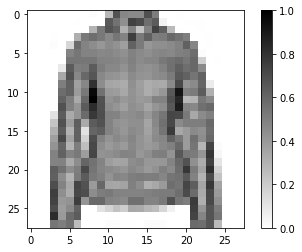

In [15]:
for image, label in test_dataset.take(1):
    break
    
image = image.numpy().reshape((28,28))   

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()
    

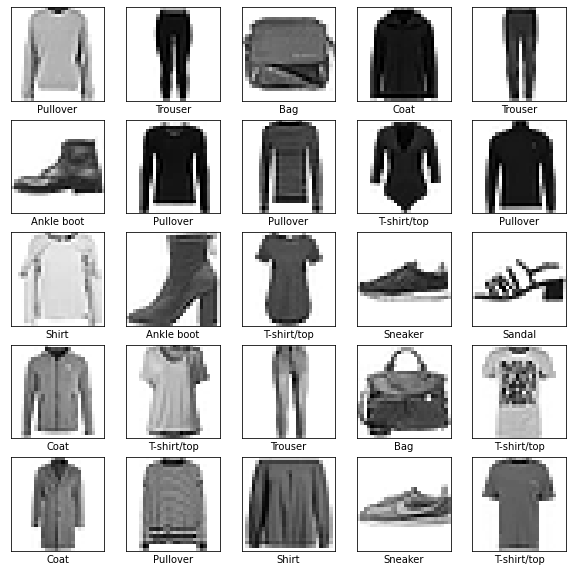

In [17]:
plt.figure(figsize=(10,10))
for i , (image,label) in enumerate(train_dataset.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()    

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [20]:
model.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(),metrics=['Accuracy'])

In [23]:
batch_size = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_example).batch(batch_size)
test_dataset = test_dataset.cache().batch(batch_size)

In [24]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_example/batch_size))

Epoch 1/5
1875/1875 [==============================] - 7s 2ms/step - loss: 0.4924 - Accuracy: 0.8282
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3743 - Accuracy: 0.8652
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3380 - Accuracy: 0.8769
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3114 - Accuracy: 0.8866
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2979 - Accuracy: 0.8898


In [25]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_example/batch_size))
print("Accuracy on test dataset:",test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.3396 - Accuracy: 0.8749
Accuracy on test dataset: 0.8748999834060669


In [26]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    prediction = model.predict(test_images)

In [27]:
prediction.shape

(32, 10)

In [28]:
prediction[0]

array([2.0687585e-04, 7.9455167e-06, 2.2363596e-02, 2.2005360e-04,
       8.7681168e-01, 1.5889912e-08, 1.0037659e-01, 5.2671789e-10,
       1.3251225e-05, 9.9755662e-09], dtype=float32)

In [29]:
np.argmax(prediction[0])

4

In [30]:
test_labels[0]

4

In [37]:
def plot_image(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img[...,0], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
  
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

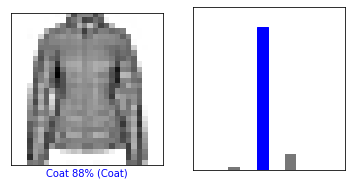

In [38]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction, test_labels)

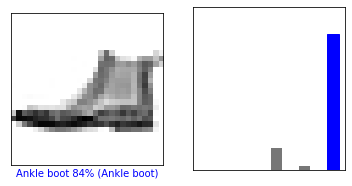

In [41]:
i = 2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction, test_labels)

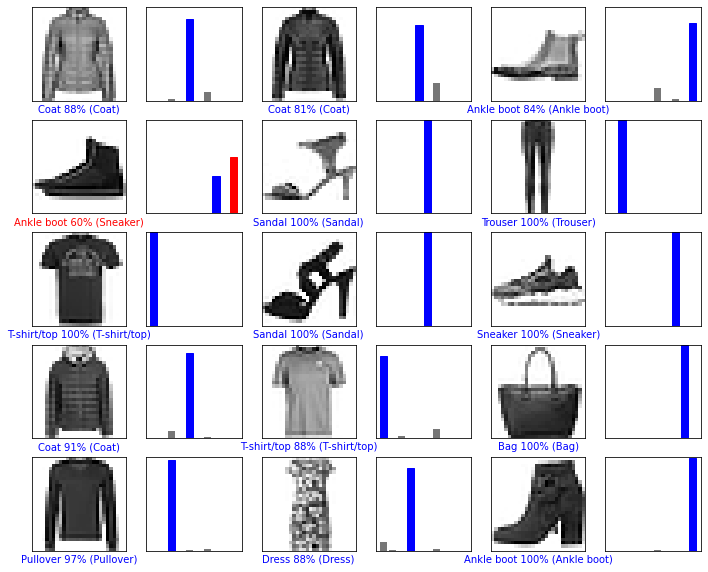

In [44]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, prediction, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, prediction, test_labels)


In [59]:
img = test_images[13]

img.shape

(28, 28, 1)

In [60]:
img = np.array([img])

img.shape

(1, 28, 28, 1)

In [61]:
predict_single = model.predict(img)
print(predict_single)

[[9.3541823e-02 6.5433490e-03 2.1390845e-03 8.7949175e-01 1.5731805e-04
  1.5454501e-04 1.7419953e-02 1.1768366e-05 2.7861088e-04 2.6171096e-04]]


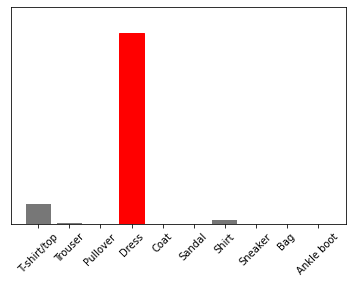

In [62]:
plot_value_array(0, predict_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [63]:
np.argmax(predict_single[0])

3